In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICE"] = "0"

In [2]:
# Example code snippet combining all steps
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, TimeDistributed, LSTM, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


2024-07-13 11:15:46.151761: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:

# Directories
train_dir = "LatestUCF"
test_dir = "balanced/DatasetFour/TestFour"


In [4]:

# Example dataset dimensions
sequence_length = 10  # Number of frames per sequence
height, width, channels = 64, 64, 3  # Dimensions of each frame (assuming RGB images)
num_classes = 10  # Number of classes for classification


In [5]:

# Function to load and preprocess sequences of images
def load_sequence_data(directory, num_samples):
    X = []
    y = []
    class_labels = sorted(os.listdir(directory))
    for label_id, class_label in enumerate(class_labels):
        class_dir = os.path.join(directory, class_label)
        for root, dirs, files in os.walk(class_dir):
            for i in range(num_samples):
                if i >= len(files):
                    break
                sequence = []
                for j in range(sequence_length):
                    img_path = os.path.join(class_dir, files[i+j])
                    img = load_img(img_path, target_size=(height, width))
                    img_array = img_to_array(img) / 255.0  # Normalize pixel values
                    sequence.append(img_array)
                X.append(sequence)
                y.append(label_id)
    return np.array(X), np.array(y)


In [7]:

# Load train and test sequences
train_sequences, train_labels = load_sequence_data(train_dir, num_samples=20000)  # Adjust num_samples as needed
test_sequences, test_labels = load_sequence_data(test_dir, num_samples=5000)  # Adjust num_samples as needed


In [8]:

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
print('test_labels',test_labels)
print('train_labels',train_labels)

test_labels [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
train_labels [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# Define the model
model = Sequential()


2024-07-13 11:16:42.832435: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-13 11:16:42.832679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-13 11:16:42.875281: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:

# Example simplified CNN part
model.add(TimeDistributed(Conv2D(filters=4, kernel_size=(3, 3), activation='relu'), input_shape=(sequence_length, height, width, channels)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))


In [11]:

# Example simplified LSTM part
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(units=num_classes, activation='softmax'))  # Output layer


2024-07-13 11:16:45.061756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-13 11:16:45.062640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-13 11:16:45.063461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:

# Print a summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 10, 62, 62, 4)    112       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 31, 31, 4)    0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 10, 3844)         0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 32)                496256    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [14]:

# Train the model with reduced batch size
num_epochs = 10
batch_size = 16  # Reduce batch size further if needed
history = model.fit(train_sequences, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(test_sequences, test_labels))


Epoch 1/10


2024-07-13 11:16:54.878825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-13 11:16:54.879858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-13 11:16:54.880676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

249/250 [============================>.] - ETA: 0s - loss: 0.5166 - accuracy: 0.8484

2024-07-13 11:16:58.800451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-13 11:16:58.801414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-13 11:16:58.802180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

250/250 [==============================] - 4s 6ms/step - loss: 0.5149 - accuracy: 0.8490 - val_loss: 2.8300 - val_accuracy: 0.4400
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0599 - accuracy: 0.9973 - val_loss: 3.5601 - val_accuracy: 0.3963
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0347 - accuracy: 0.9967 - val_loss: 3.4785 - val_accuracy: 0.4387
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0143 - accuracy: 0.9998 - val_loss: 4.3710 - val_accuracy: 0.4062
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 4.5330 - val_accuracy: 0.4425
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 5.0323 - val_accuracy: 0.3713
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 4.9849 - val_accuracy: 0.4350
Epoch 8/10
250/25

In [15]:

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_sequences, test_labels)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')


 1/25 [>.............................] - ETA: 7s - loss: 10.5960 - accuracy: 0.0000e+00

2024-07-13 11:17:16.129405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-13 11:17:16.130396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-13 11:17:16.131147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 0s 5ms/step - loss: 5.6586 - accuracy: 0.4125
Test loss: 5.6586, Test accuracy: 0.4125


In [16]:
# Predict classes for test data
y_pred = model.predict(test_sequences)
y_pred_classes = np.argmax(y_pred, axis=1)


24/25 [===========================>..] - ETA: 0s

2024-07-13 11:17:20.093059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-13 11:17:20.094087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-13 11:17:20.094824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 0s 5ms/step


In [17]:

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  0   0 200   0]
 [  0 130  21  49]
 [  0   0 200   0]
 [  0   0 200   0]]


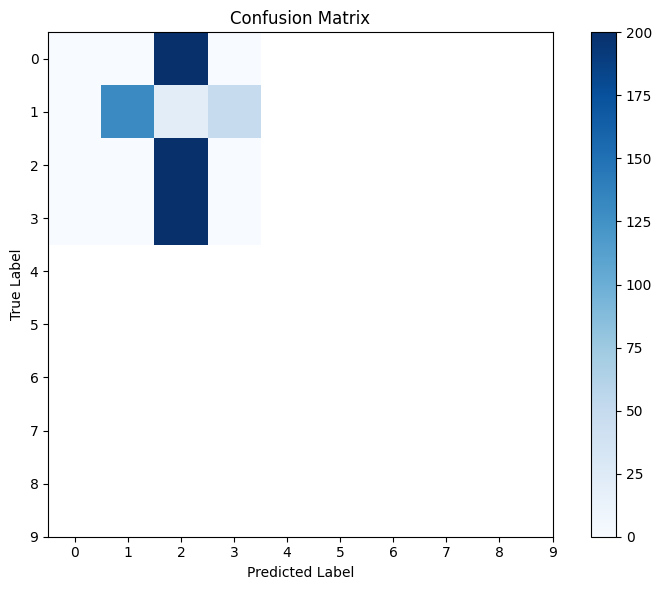

In [18]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [19]:
 Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (436074980.py, line 1)